In [40]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme(style = 'whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.metrics import  mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import joblib

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)


# Read and Explore

In [27]:
df = pd.read_csv("kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [28]:
df.info() # no null | wrong Dtype in column date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [29]:
df['date'].apply(lambda x : x.split('T')[1]).unique()

array(['000000'], dtype=object)

In [30]:
df['year'] = df['date'].apply(lambda x : x.split('T')[0][:4])
df['month'] = df['date'].apply(lambda x : x.split('T')[0][4:6])
df['day'] = df['date'].apply(lambda x : x.split('T')[0][6:])
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,09
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,02,25
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,09
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,02,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,05,21
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,02,23
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,06,23
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,01,16


<Axes: xlabel='price', ylabel='Count'>

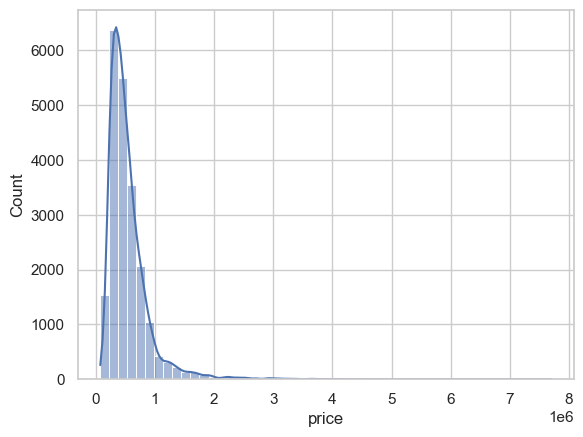

In [31]:
sns.histplot(df['price'], bins=50, kde=True)

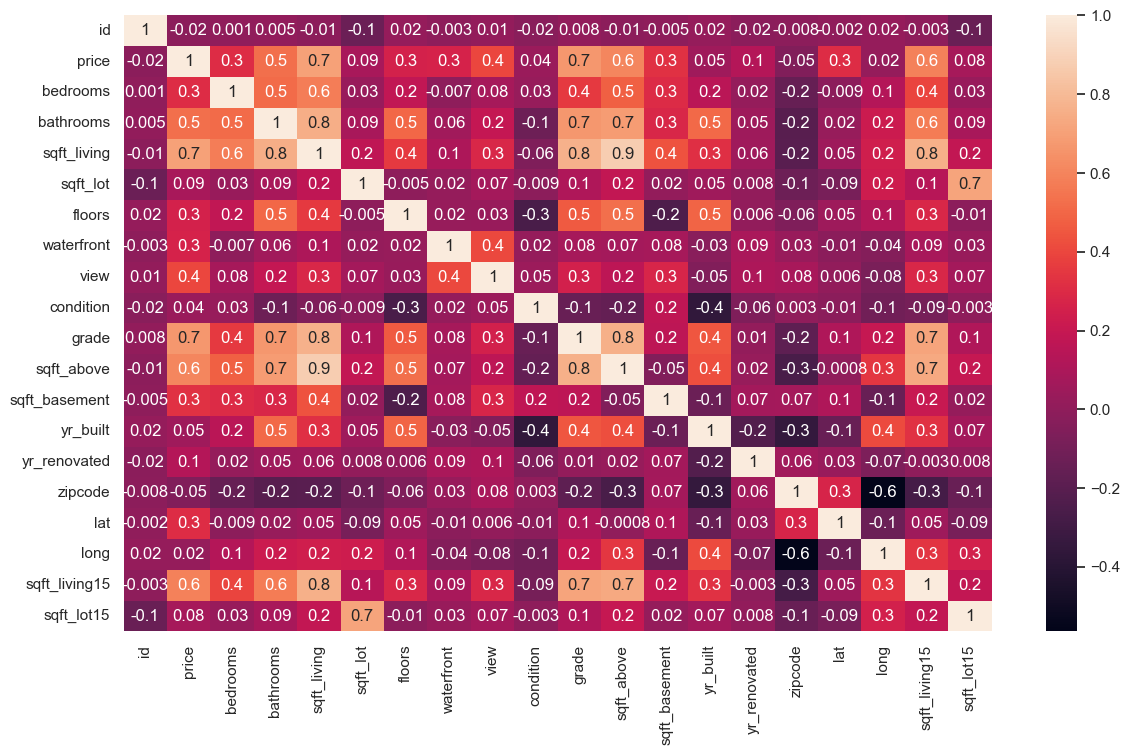

In [32]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True,fmt=".1g")
plt.show()

In [33]:
# Feature Selection
# We will select a few features that have a high correlation with the target variable 'price'
selected_features = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15']
selected_features

['sqft_living', 'grade', 'sqft_above', 'sqft_living15']

In [34]:
# Split the data into features and target variable
X = df[selected_features]
y = df['price']

In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Model Building
# 1. Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# 2. Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# 3. Support Vector Regression (SVR)
svr_reg = SVR(kernel='linear')
svr_reg.fit(X_train, y_train)

# 4. Gradient Boosting Regression
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [37]:
# Model Evaluation
# 1. Linear Regression
y_pred_linear = linear_reg.predict(X_test)
linear_rmse = np.sqrt(mean_squared_error(y_test, y_pred_linear))
print("\nRoot Mean Squared Error (Linear Regression):", linear_rmse)

# 2. Random Forest Regression
y_pred_rf = rf_reg.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("Root Mean Squared Error (Random Forest Regression):", rf_rmse)

# 3. Support Vector Regression (SVR)
y_pred_svr = svr_reg.predict(X_test)
svr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_svr))
print("Root Mean Squared Error (SVR):", svr_rmse)

# 4. Gradient Boosting Regression
y_pred_gb = gb_reg.predict(X_test)
gb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_gb))
print("Root Mean Squared Error (Gradient Boosting Regression):", gb_rmse)


Root Mean Squared Error (Linear Regression): 262421.8471167618
Root Mean Squared Error (Random Forest Regression): 260723.33323096632
Root Mean Squared Error (SVR): 285307.5186235822
Root Mean Squared Error (Gradient Boosting Regression): 249010.41207474892


In [38]:
# Choose the best model based on RMSE
model_rmse = {'Linear Regression': linear_rmse,
              'Random Forest Regression': rf_rmse,
              'SVR': svr_rmse,
              'Gradient Boosting Regression': gb_rmse}

best_model = min(model_rmse, key=model_rmse.get)
print("\nBest Model:", best_model)


Best Model: Gradient Boosting Regression


In [41]:
# Predict the price of a new house using the best model
new_house = [[2000, 8, 1800, 2000]]  # Example input features: [sqft_living, grade, sqft_above, sqft_living15]
print("\nPredicted Price of the New House:", gb_reg.predict(new_house))


Predicted Price of the New House: [500410.72323907]


In [42]:
# Save the best model
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']